## 1. BeDT troubadour witness file 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "data/"

input_file = data_dir + "BeDT_prepared.csv"
output_file = data_dir + "witness_distribution/BeDT_witness.csv"
    
df = pd.read_csv(input_file, sep=';')
df.head()

,SIGLA,vnum,repertorio_n,rubrica_1,incipit_ms,inizio,fine
0,p_^b2_0001,,BEdT 375.B.A,Pons decapduill,Pons decapduill si fo un gentils bars del puei...,009 r,009 r
1,p_^b2_0002,,"BEdT 375,010",Pons decapdueill.,Humils e francx e fis soplei ues uos,009 r,009 v
2,p_^b2_0003,,"BEdT 375,001",P. de cap.,Aissi mes pres com selui que sercan,009 v,015 v
3,p_^b2_0004,,BEdT 375.B.B,-,Pons decapdueill si amet com aues auzit denan....,015 v,016 r
4,p_^b2_0005,,"BEdT 375,020",-,Aissi com sel ca pron de ualedors,016 r,016 v


### Présence de doublons ! 

In [2]:
df[df["SIGLA"]=="p_^b2_0002"]

,SIGLA,vnum,repertorio_n,rubrica_1,incipit_ms,inizio,fine
1,p_^b2_0002,,"BEdT 375,010",Pons decapdueill.,Humils e francx e fis soplei ues uos,009 r,009 v
12292,p_^b2_0002,,"BEdT 375,010",Pons decapdueill.,Humils e francx e fis soplei ues uos,009 r,009 v


In [3]:
def process_BeDT(input_file, output_file):

    df = pd.read_csv(input_file, sep=';')
    
    # Select and rename the columns
    result_df = df[['SIGLA', 'repertorio_n', 'rubrica_1']].copy()
    result_df.columns = ['witness_ID', 'text_ID', 'author']

    result_df = result_df.drop_duplicates()
    
    # Save to new CSV file
    result_df.to_csv(output_file, sep=";", index=False)
    
    return result_df

def plot_witness_distribution(df):
    witness_counts = df.groupby('text_ID')['witness_ID'].count().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(data=witness_counts, bins='auto', color='blue', alpha=0.6, kde=True)
    plt.title('Distribution du nombre de témoins par œuvre')
    plt.xlabel('Nombre de témoins')
    plt.ylabel('Nombre d\'œuvres')
    
    plt.axvline(witness_counts.median(), color='red', linestyle='dashed', linewidth=1,
                label=f'Médiane ({witness_counts.median():.1f})')
    plt.legend()
    plt.grid(True, alpha=0.3)

In [4]:
BeDT_data = process_BeDT(input_file, output_file)
BeDT_data.head()

,witness_ID,text_ID,author
0,p_^b2_0001,BEdT 375.B.A,Pons decapduill
1,p_^b2_0002,"BEdT 375,010",Pons decapdueill.
2,p_^b2_0003,"BEdT 375,001",P. de cap.
3,p_^b2_0004,BEdT 375.B.B,-
4,p_^b2_0005,"BEdT 375,020",-


In [5]:
BeDT_data.describe()

,witness_ID,text_ID,author
count,12291,12291,12290
unique,12291,2776,4193
top,p_^b2_0001,"BEdT 364,039",-
freq,1,28,2126


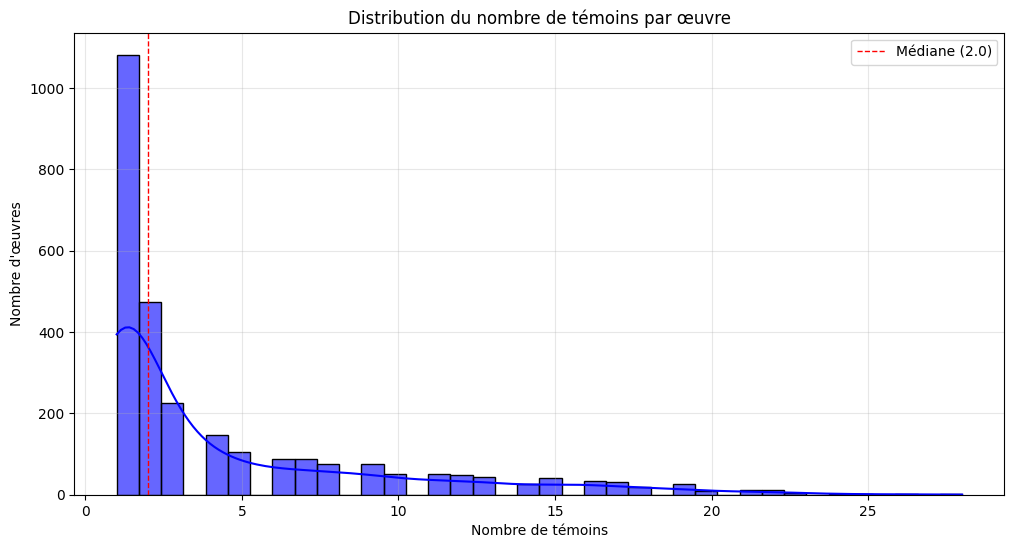

In [6]:
plot_witness_distribution(BeDT_data)

## 2. Chanson de gestes et romans français (`corpora_merged`)

In [7]:
input_file = data_dir + "Corpora_Merged_list_with_corrs_2_revu-Guidi.csv"
output_file = data_dir + "witness_distribution/Corpora_Merged_witness.csv"
    
df = pd.read_csv(input_file, sep=',')
df.head()

/tmp/ipykernel_1084813/2477361494.py:4: DtypeWarning: Columns (0,4,17,22,28,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, sep=',')


,ToCheck,Shelfmark,textAuthor-freetext,TRI,workTitle-freetext,textTitle-freetext,Form,siglum,status,Settlement,...,Colonne982,Colonne983,Colonne984,Colonne985,Colonne986,Colonne987,Colonne988,Colonne989,Colonne990,Colonne991
0,False,"Paris, Bibliothèque nationale de France, franç...",NaN,Aimeri de Narbonne,Aimeri de Narbonne,Aimeri de Narbonne,verse,B2,NaN,Paris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,"Firenze, Biblioteca nazionale centrale, Class....",NaN,Aimeri de Narbonne,Aimeri de Narbonne,Amerigo di Nerbona,NaN,NaN,translation or rewriting,Firenze,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,", ,",NaN,Aimeri de Narbonne,Aimeri de Narbonne,"prose latine: Alberic de Trois Fontaines, Chro...",prose,NaN,translation or rewriting,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,"Paris, Bibliothèque nationale de France, nouve...",NaN,Aimeri de Narbonne,Aimeri de Narbonne,prose: Chronique de France,verse,NaN,translation or rewriting,Paris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,"Bruxelles, Bibliothèque royale, 9068",NaN,Aimeri de Narbonne,Aimeri de Narbonne,"prose: David Aubert, les Chroniques et Conques...",prose,NaN,translation or rewriting,Bruxelles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def process_corpora_merged(input_file, output_file):
    
    df = pd.read_csv(input_file, sep=',')
    
    # Create witness_ID by combining Settlement, repository and shelfmark when available
    df['witness_ID'] = df.apply(lambda x: f"{x['textTitle-freetext']}, {x['Shelfmark']}" 
                               if pd.notna(pd.notna(x['textTitle-freetext']) and pd.notna(x['Shelfmark']))
                               else x['textTitle-freetext'], axis=1)
    
    # Select and rename the columns
    result_df = pd.DataFrame({
        'witness_ID': df['witness_ID'],
        'text_ID': df['TRI'],
        'author': df['textAuthor-freetext']
    })
    
    # Remove empty rows
    # result_df = result_df.dropna(subset=['text_ID'])
    
    # Remove duplicates
    # result_df = result_df.drop_duplicates()
    
    # Save to new CSV file
    result_df.to_csv(output_file, sep=";", index=False)
    
    return result_df



In [9]:
# Process the data
corpora_data = process_corpora_merged(input_file, output_file)
corpora_data.head()


/tmp/ipykernel_1084813/3676239405.py:3: DtypeWarning: Columns (0,4,17,22,28,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file, sep=',')


,witness_ID,text_ID,author
0,"Aimeri de Narbonne, Paris, Bibliothèque nation...",Aimeri de Narbonne,NaN
1,"Amerigo di Nerbona, Firenze, Biblioteca nazion...",Aimeri de Narbonne,NaN
2,"prose latine: Alberic de Trois Fontaines, Chro...",Aimeri de Narbonne,NaN
3,"prose: Chronique de France, Paris, Bibliothèqu...",Aimeri de Narbonne,NaN
4,"prose: David Aubert, les Chroniques et Conques...",Aimeri de Narbonne,NaN


In [10]:
corpora_data.describe()

,witness_ID,text_ID,author
count,2173,2173,422
unique,2152,286,50
top,"Tristan, , ,",Tristan,Benoit de Sainte-Maure
freq,10,111,63


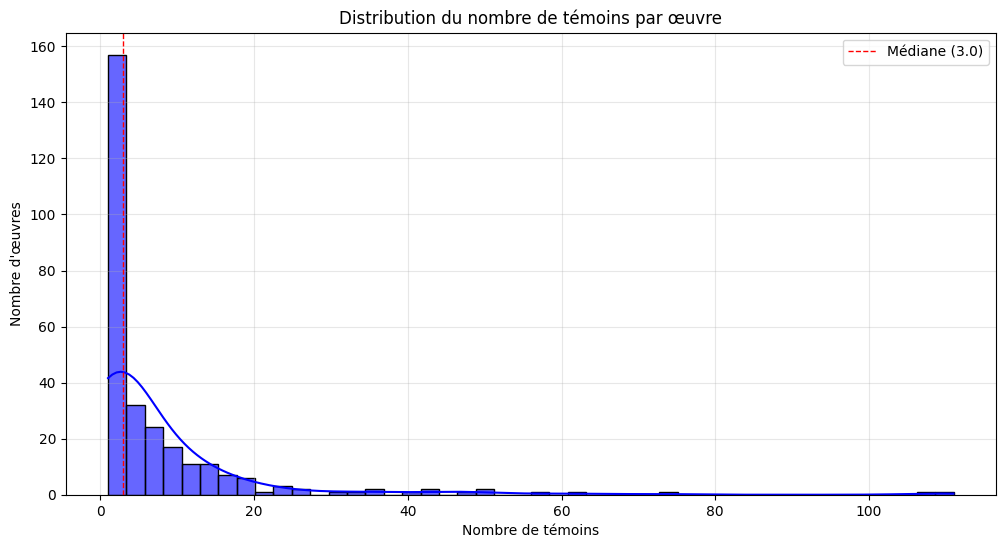

In [11]:
plot_witness_distribution(corpora_data)

## 3. Incunables italiens

In [12]:
input_file = data_dir + "ISTC_ex_Italy_by-witness.csv"
output_file = data_dir + "witness_distribution/ISTC_witness.csv"
    
df = pd.read_csv(input_file, sep=',')
df.head()

,Unnamed: 0,X_id,data.author,data.dimensions,data.holdings.holding_institution_name,data.holdings.copy_note,data.imprint.geo_info.geona.mes_id,data.imprint.imprint_place,data.imprint.imprint_name,data.imprint.i.mprint_date,data.language_of_item,data..title,text
0,1.0,il00001000,"Lactantius, Lucius Coelius Firmianus",f°,Cambridge UL,wanting errata leaf,6540526,Subiaco,[Conradus Sweynheym and Arnoldus Pannartz],29 Oct. 1465,lat,Opera,"Lactantius, Lucius Coelius Firmianus Opera"
1,2.0,il00001000,"Lactantius, Lucius Coelius Firmianus",f°,Chatsworth,imperfect,6540526,Subiaco,[Conradus Sweynheym and Arnoldus Pannartz],29 Oct. 1465,lat,Opera,"Lactantius, Lucius Coelius Firmianus Opera"
2,3.0,il00001000,"Lactantius, Lucius Coelius Firmianus",f°,British Library,NaN,6540526,Subiaco,[Conradus Sweynheym and Arnoldus Pannartz],29 Oct. 1465,lat,Opera,"Lactantius, Lucius Coelius Firmianus Opera"
3,4.0,il00001000,"Lactantius, Lucius Coelius Firmianus",f°,British Library,NaN,6540526,Subiaco,[Conradus Sweynheym and Arnoldus Pannartz],29 Oct. 1465,lat,Opera,"Lactantius, Lucius Coelius Firmianus Opera"
4,5.0,il00001000,"Lactantius, Lucius Coelius Firmianus",f°,British Library,NaN,6540526,Subiaco,[Conradus Sweynheym and Arnoldus Pannartz],29 Oct. 1465,lat,Opera,"Lactantius, Lucius Coelius Firmianus Opera"


In [13]:
def process_ISTC(input_file, output_file):

    df = pd.read_csv(input_file, sep=',')

    df['witness_ID'] = df.apply(lambda x: f"{x['text']}, {x['data.holdings.holding_institution_name']}, {x['Unnamed: 0']}", axis=1)
    
    # Select and rename the columns
    result_df = df[['witness_ID', 'text', 'data.author']].copy()
    result_df.columns = ['witness_ID', 'text_ID', 'author']
    
    # Save to new CSV file
    result_df.to_csv(output_file, sep=";", index=False)
    
    return result_df

In [14]:
incunable_data = process_ISTC(input_file, output_file)
incunable_data.head()

,witness_ID,text_ID,author
0,"Lactantius, Lucius Coelius Firmianus Opera, Ca...","Lactantius, Lucius Coelius Firmianus Opera","Lactantius, Lucius Coelius Firmianus"
1,"Lactantius, Lucius Coelius Firmianus Opera, Ch...","Lactantius, Lucius Coelius Firmianus Opera","Lactantius, Lucius Coelius Firmianus"
2,"Lactantius, Lucius Coelius Firmianus Opera, Br...","Lactantius, Lucius Coelius Firmianus Opera","Lactantius, Lucius Coelius Firmianus"
3,"Lactantius, Lucius Coelius Firmianus Opera, Br...","Lactantius, Lucius Coelius Firmianus Opera","Lactantius, Lucius Coelius Firmianus"
4,"Lactantius, Lucius Coelius Firmianus Opera, Br...","Lactantius, Lucius Coelius Firmianus Opera","Lactantius, Lucius Coelius Firmianus"


In [15]:
incunable_data.describe()

,witness_ID,text_ID,author
count,300356,300356,277054
unique,300352,4783,1390
top,"Thomas Aquinas Opuscula, München BSB, 104122.1",Biblia latina,"Cicero, Marcus Tullius"
freq,2,3904,8657


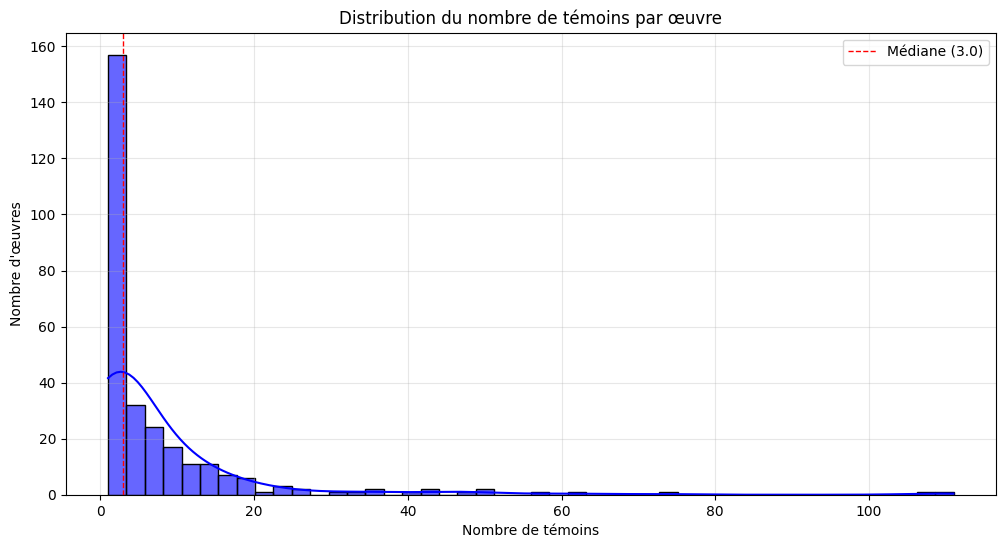

In [16]:
plot_witness_distribution(corpora_data)

## 4. Middle English dictionnary

In [17]:
input_file = data_dir + "MED_scraped.csv"
output_file = data_dir + "witness_distribution/MED_witness.csv"
    
df = pd.read_csv(input_file, sep=',')
df.head()

,id,title,nwits
0,BIB580,Canterbury Tales: Clerk's Prologue and Tale (i...,63
1,BIB596,"Canterbury Tales: Shipman-Prioress Link, Prior...",61
2,BIB3615,Wycliffite Bible (later version),61
3,BIB588,Canterbury Tales: Thopas-Melibee Link and Tale...,60
4,BIB591,"Canterbury Tales: Man of Law's Head-Link, Prol...",60


In [18]:
def process_MED(input_file, output_file):

    df = pd.read_csv(input_file, sep=',')

    expanded_rows = []
    for _, row in df.iterrows():
        for i in range(int(row['nwits'])):
            expanded_rows.append({
                'witness_ID': f"{row['id']}_{i+1}",
                'text_ID': row['id'],
                'author': ""
            })

    result_df = pd.DataFrame(expanded_rows)
    
    # Save to new CSV file
    result_df.to_csv(output_file, sep=";", index=False)
    
    return result_df

In [19]:
MED_data = process_MED(input_file, output_file)
MED_data.head()

,witness_ID,text_ID,author
0,BIB580_1,BIB580,
1,BIB580_2,BIB580,
2,BIB580_3,BIB580,
3,BIB580_4,BIB580,
4,BIB580_5,BIB580,


In [20]:
MED_data.describe()

,witness_ID,text_ID,author
count,10594,10594,10594
unique,10594,4547,1
top,BIB580_1,BIB580,
freq,1,63,10594


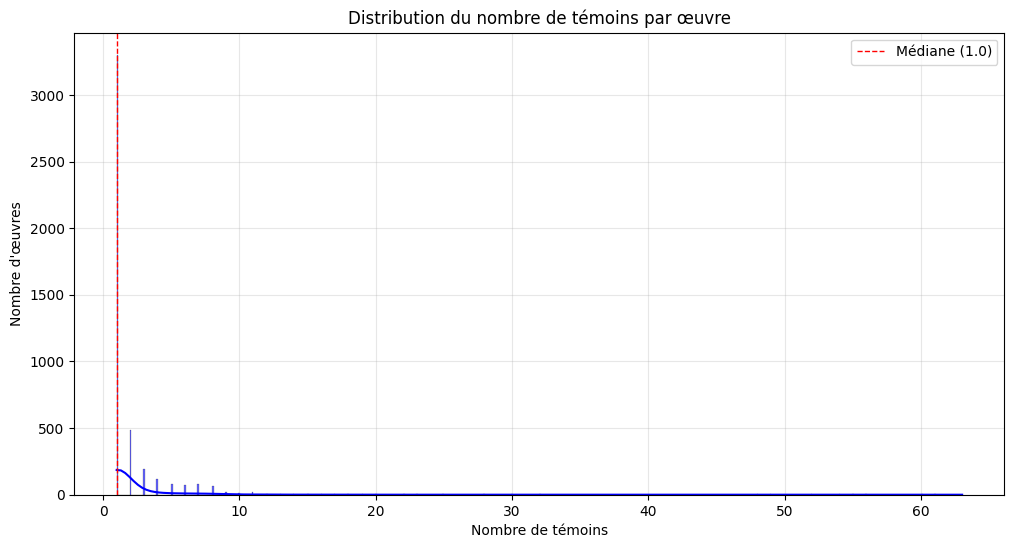

In [21]:
plot_witness_distribution(MED_data)

## 5. Handschriftencensus

In [22]:
input_file = data_dir + "handschriftencensus.csv"
output_file = data_dir + "witness_distribution/handschriftencensus_witness.csv"
    
df = pd.read_csv(input_file, sep=',')
df.head()

,Eliminate?,Title,NWits,Note JBC
0,X,Ablaßgebete,48,Prayers for indulgency
1,X,Aderlassregeln,99,medical treatises?
2,X,Annalistische Nachrichten,9,NaN
3,X,Antiphon,38,antiphonary
4,X,Anweisung für Büchsenmeister,1,NaN


In [23]:
def process_hands(input_file, output_file):

    df = pd.read_csv(input_file, sep=',')

    expanded_rows = []
    for _, row in df.iterrows():
        if row["Eliminate?"] != "X":
            for i in range(int(row['NWits'])):
                expanded_rows.append({
                    'witness_ID': f"{row['Title']}_{i+1}",
                    'text_ID': row['Title'],
                    'author': ""
                })

    result_df = pd.DataFrame(expanded_rows)
    
    # Save to new CSV file
    result_df.to_csv(output_file, sep=";", index=False)
    
    return result_df

In [24]:
hands_data = process_hands(input_file, output_file)
hands_data.head()

,witness_ID,text_ID,author
0,'(Berliner) Psalmen-Fragmente'_1,'(Berliner) Psalmen-Fragmente',
1,'(Großes) Benediktbeurer Passionsspiel'_1,'(Großes) Benediktbeurer Passionsspiel',
2,'(Kölner) Amtleutebuch von St. Brigida'_1,'(Kölner) Amtleutebuch von St. Brigida',
3,'(Salzburger) Heldenepos-Fragment'_1,'(Salzburger) Heldenepos-Fragment',
4,'A solis ortus cardine' (deutsch)_1,'A solis ortus cardine' (deutsch),


In [25]:
hands_data.describe()

,witness_ID,text_ID,author
count,37148,37148,37148
unique,37148,6285,1
top,'(Berliner) Psalmen-Fragmente'_1,Glossenhandschrift (ahd. / as.),
freq,1,1332,37148


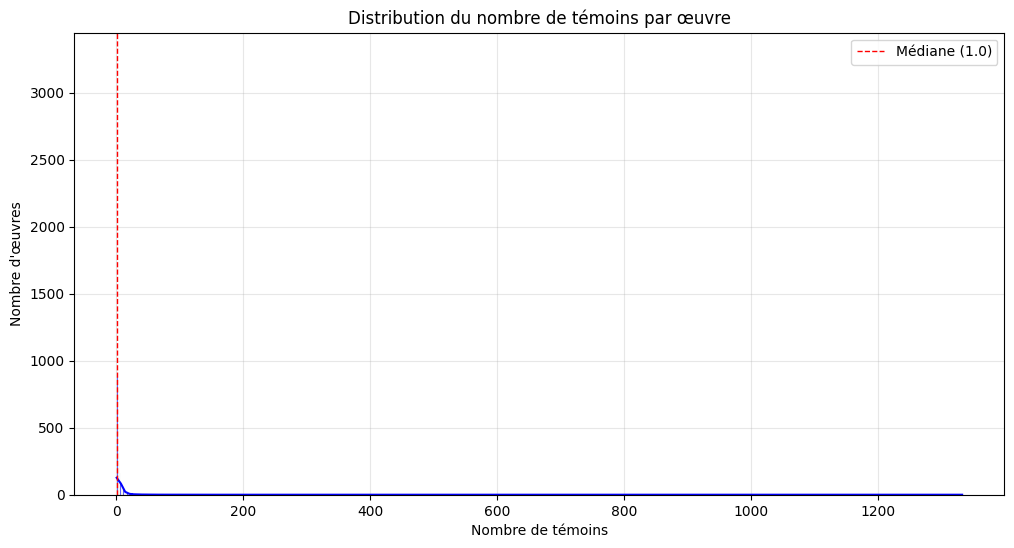

In [26]:
plot_witness_distribution(hands_data)

## 6. Forgotten books

In [27]:
forgotten_books_language = ["anglo-norman", 
                            "dutch", 
                            "english", 
                            "french", 
                            "german", 
                            "icelandic", 
                            "irish"]

def process_forgotten_books(input_file, output_file):

    df = pd.read_excel(input_file)
    
    # Select and rename the columns
    result_df = df[['signature', 'title']].copy()
    result_df.columns = ['witness_ID', 'text_ID']
    
    # Save to new CSV file
    result_df.to_csv(output_file, sep=";", index=False)
    
    return result_df


In [28]:
forgotten_books_data = []

for l in forgotten_books_language:
    input_file = data_dir + "forgotten_books_" + l + ".xlsx"
    output_file = data_dir + "witness_distribution/" + "forgotten_books_" + l + "_witness.csv"
    
    forgotten_books_data.append(process_forgotten_books(input_file, output_file))

In [29]:
df = pd.read_excel(input_file)
df.head()

,title,signature,repository
0,Acallam na senórach,Bodleian Laud Misc 610,"Bodleian Library, Oxford"
1,Acallam na senórach,Bodleian Rawlinson B 487,"Bodleian Library, Oxford"
2,Acallam na senórach,UCC Book of Lismore,"University College Library, Cork"
3,Acallam na senórach,UCD OFM A4,University College Dublin
4,Acallam na senórach,UCC Book of Lismore,"University College Library, Cork"


anglo-norman


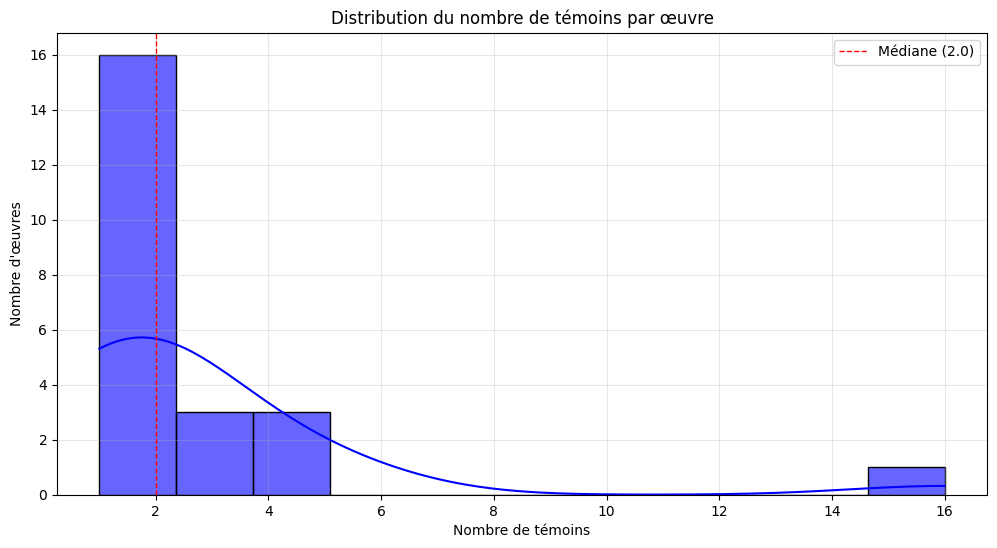

dutch


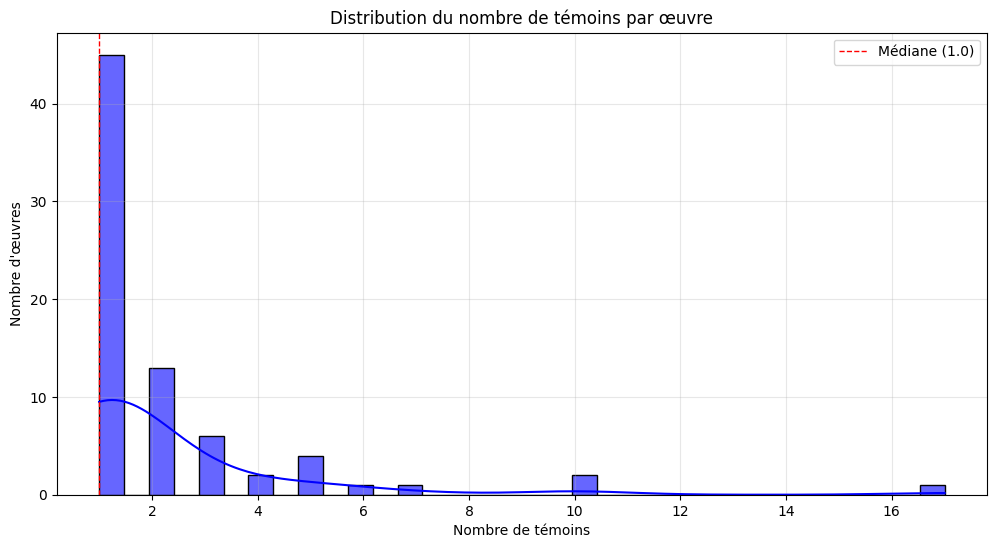

english


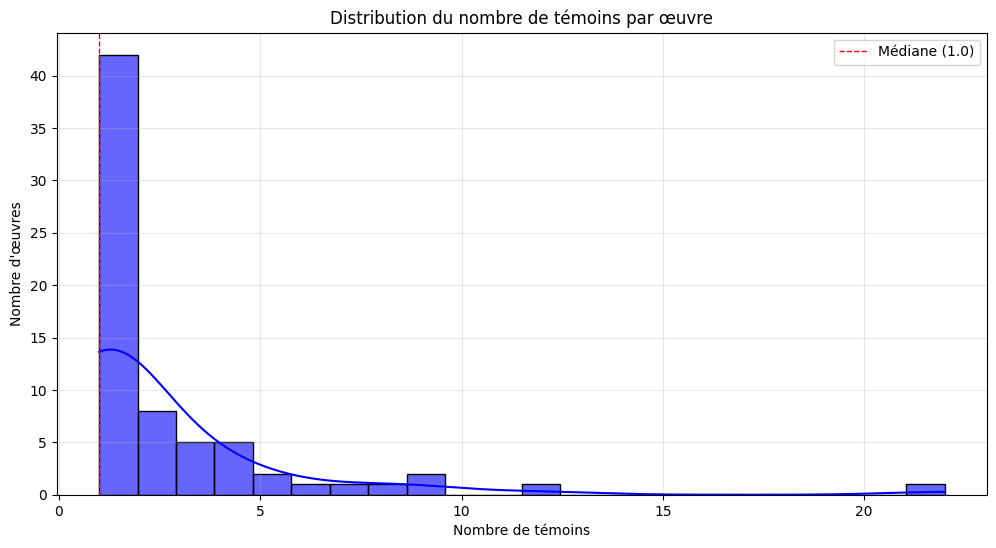

french


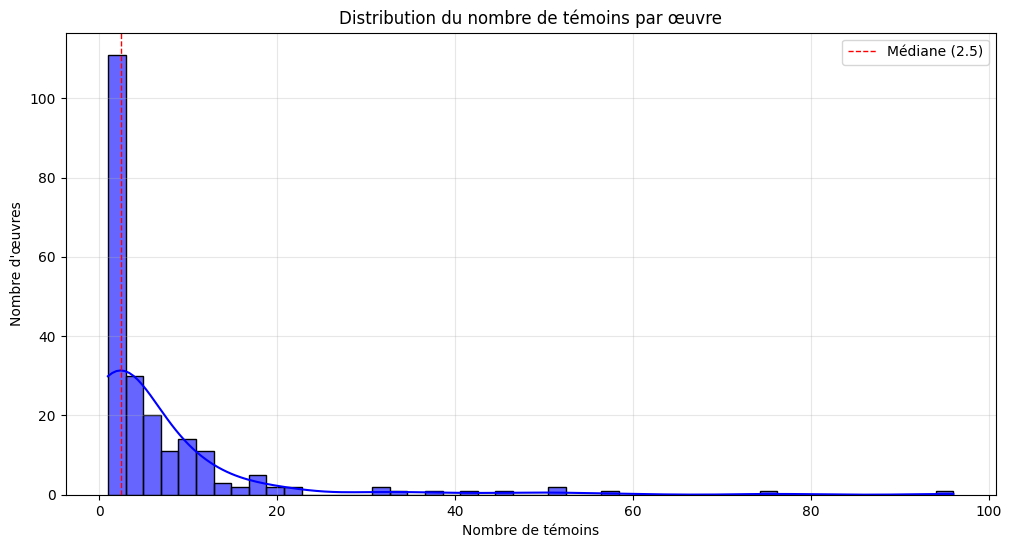

german


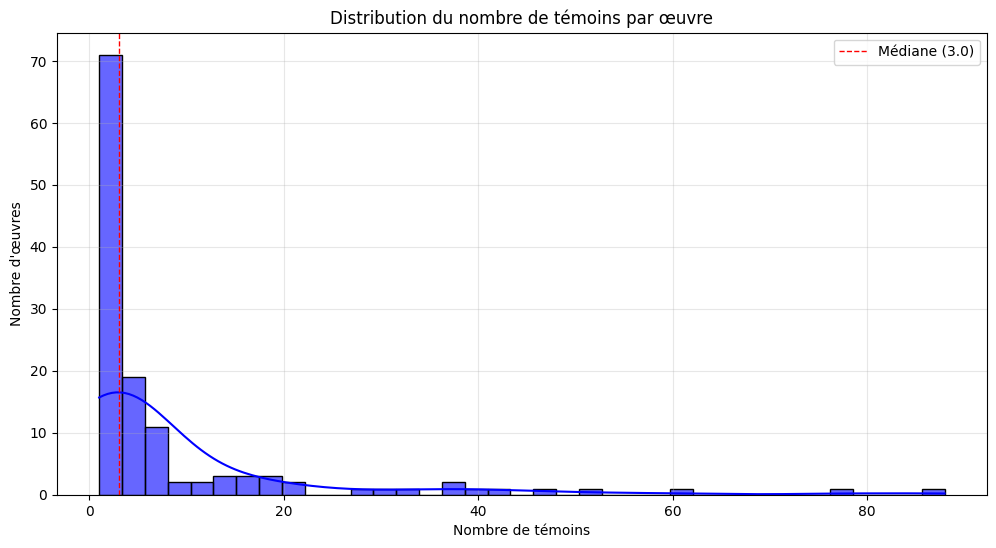

icelandic


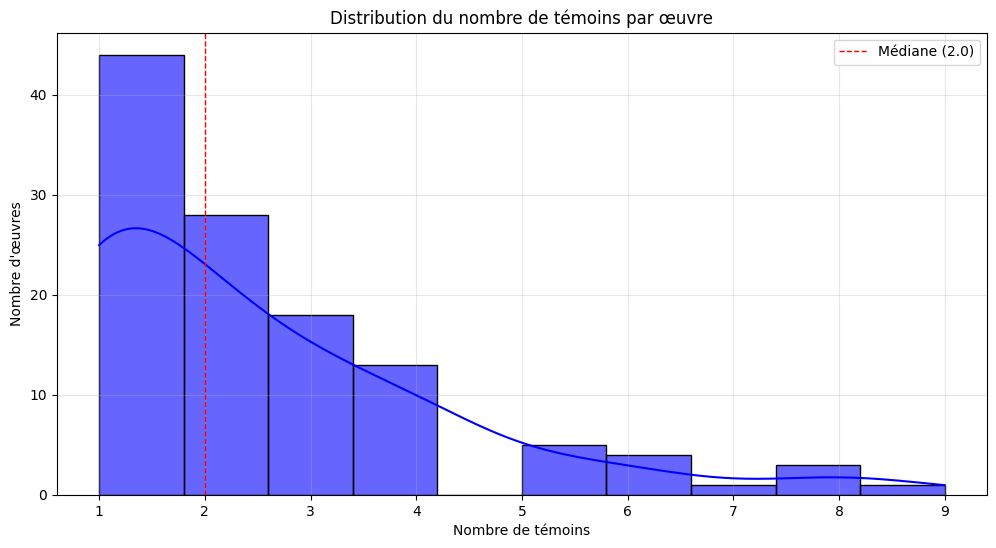

irish


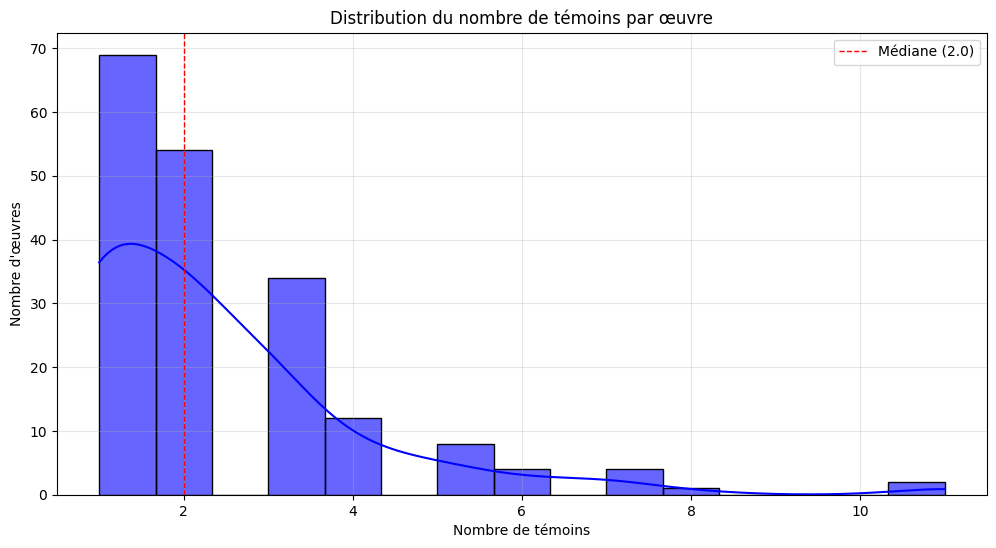

In [30]:
for (l,df) in zip(forgotten_books_language, forgotten_books_data):
    print(l)
    plot_witness_distribution(df)
    plt.show()

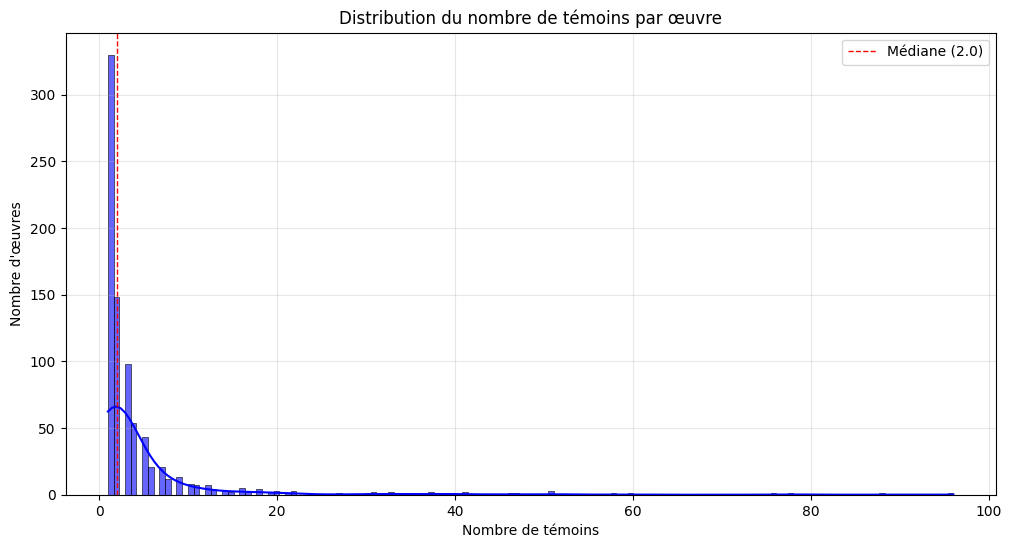

In [31]:
merge_forgotten_books = pd.concat(forgotten_books_data, axis=0)
plot_witness_distribution(merge_forgotten_books)